In [1]:
import os
import json
import random
import numpy as np

import matplotlib.pyplot as plt
import numpy as np

In [2]:
benchmarks = ["APPS", "HumanEval"]
models = ["llama3", "llama3.1", "mistral-nemo", "qwen2.5-coder"]
modes = [None, "instruction", "rule"]

In [3]:
def tie_break(data):
    ties = [i for i in data if i[1][0] == data[0][1][0]]
    return random.choice(ties)

def get_entropy(data):
    probs = np.array(data)[:, 0].astype(float)
    probs = probs / np.sum(probs)
    entropy = -np.sum(probs * np.log2(probs))
    return entropy

def vote(mode, benchmark, model, prompt_mode=None):
    if not prompt_mode:
        with open(f"./preprocessed_results/{mode}/{benchmark}_{model}.json", "r") as f:
            data =json.load(f)
    if prompt_mode:
        with open(f"./preprocessed_results/{mode}/{benchmark}_{model}_{prompt_mode}.json", "r") as f:
            data =json.load(f)
    result = []
    entropy = []

    for problem_id, samples in data.items():
        sample_dict = dict()
        for sample in samples:
            if sample[0] not in sample_dict:
                sample_dict[sample[0]] = [1, sample[1]["result"]]
            elif sample[0] in sample_dict:
                sample_dict[sample[0]][0] += 1
        major = sorted(sample_dict.items(), key=lambda x:x[1][0], reverse=True)
        entropy.append(get_entropy(list(sample_dict.values())))
        if "passed" in tie_break(major)[1][1]:
            result.append(True)
        else:
            result.append(False)
        
    return result, entropy

## Augmented

In [4]:
for bm in benchmarks:
    print(bm)
    for model in models:
        for mode in modes:
            if not mode:
                result, entr = vote("augmented", bm, model + "_augmented")
            if mode:
                result, entr = vote("augmented", bm, model, mode + "_augmented")
            print(f"{model}: {result.count(True)}/{len(result)}, entropy: {np.mean(entr):.4f}")

APPS
llama3: 20/300, entropy: 4.2075
llama3: 22/300, entropy: 4.2065
llama3: 19/300, entropy: 4.2756
llama3.1: 17/300, entropy: 4.2119
llama3.1: 9/300, entropy: 4.2453
llama3.1: 3/300, entropy: 4.3203
mistral-nemo: 32/300, entropy: 4.2141
mistral-nemo: 29/300, entropy: 4.2324
mistral-nemo: 17/300, entropy: 4.2609
qwen2.5-coder: 18/300, entropy: 4.1487
qwen2.5-coder: 16/300, entropy: 4.1856
qwen2.5-coder: 5/300, entropy: 4.2735
HumanEval
llama3: 56/164, entropy: 3.5220
llama3: 49/164, entropy: 3.7288
llama3: 25/164, entropy: 4.0742
llama3.1: 88/164, entropy: 3.2418
llama3.1: 80/164, entropy: 3.4414
llama3.1: 54/164, entropy: 4.1726
mistral-nemo: 55/164, entropy: 3.2060
mistral-nemo: 56/164, entropy: 3.4040
mistral-nemo: 43/164, entropy: 3.8630
qwen2.5-coder: 106/164, entropy: 2.2601
qwen2.5-coder: 123/164, entropy: 2.2092
qwen2.5-coder: 119/164, entropy: 2.9665


## AST-only

In [5]:
for bm in benchmarks:
    print(bm)
    for model in models:
        for mode in modes:
            result, entr = vote("ast_only", bm, model, mode)
            print(f"{model}: {result.count(True)}/{len(result)}, entropy: {np.mean(entr):.4f}")

APPS
llama3: 18/300, entropy: 4.1782
llama3: 21/300, entropy: 4.2031
llama3: 18/300, entropy: 4.2745
llama3.1: 18/300, entropy: 4.1933
llama3.1: 11/300, entropy: 4.2374
llama3.1: 3/300, entropy: 4.3193
mistral-nemo: 28/300, entropy: 4.1939
mistral-nemo: 32/300, entropy: 4.2112
mistral-nemo: 18/300, entropy: 4.2504
qwen2.5-coder: 18/300, entropy: 4.1335
qwen2.5-coder: 15/300, entropy: 4.1765
qwen2.5-coder: 6/300, entropy: 4.2696
HumanEval
llama3: 62/164, entropy: 3.3802
llama3: 53/164, entropy: 3.6280
llama3: 24/164, entropy: 4.0433
llama3.1: 87/164, entropy: 3.1383
llama3.1: 81/164, entropy: 3.3463
llama3.1: 54/164, entropy: 4.1527
mistral-nemo: 59/164, entropy: 3.0822
mistral-nemo: 58/164, entropy: 3.2893
mistral-nemo: 51/164, entropy: 3.7295
qwen2.5-coder: 108/164, entropy: 2.0959
qwen2.5-coder: 126/164, entropy: 2.0695
qwen2.5-coder: 119/164, entropy: 2.7535


## Variable Unified

In [6]:
for bm in benchmarks:
    print(bm)
    for model in models:
        for mode in modes:
            result, entr = vote("var_unif", bm, model, mode)
            print(f"{model}: {result.count(True)}/{len(result)}, entropy: {np.mean(entr):.4f}")

APPS
llama3: 20/300, entropy: 4.1645
llama3: 18/300, entropy: 4.2031
llama3: 17/300, entropy: 4.2681
llama3.1: 20/300, entropy: 4.1611
llama3.1: 11/300, entropy: 4.2222
llama3.1: 4/300, entropy: 4.3185
mistral-nemo: 34/300, entropy: 4.1611
mistral-nemo: 32/300, entropy: 4.1831
mistral-nemo: 21/300, entropy: 4.2401
qwen2.5-coder: 22/300, entropy: 4.1175
qwen2.5-coder: 20/300, entropy: 4.1660
qwen2.5-coder: 8/300, entropy: 4.2640
HumanEval
llama3: 63/164, entropy: 3.2169
llama3: 51/164, entropy: 3.5087
llama3: 32/164, entropy: 3.8887
llama3.1: 91/164, entropy: 2.9190
llama3.1: 85/164, entropy: 3.1593
llama3.1: 58/164, entropy: 3.9874
mistral-nemo: 57/164, entropy: 2.9634
mistral-nemo: 62/164, entropy: 3.2047
mistral-nemo: 62/164, entropy: 3.5518
qwen2.5-coder: 108/164, entropy: 1.8344
qwen2.5-coder: 127/164, entropy: 1.7788
qwen2.5-coder: 123/164, entropy: 2.3531


## Visualize

In [18]:
def load_and_visualize(benchmark, models, technique_wise_results):
    data1 = technique_wise_results[0]
    data2 = technique_wise_results[1]
    data3 = technique_wise_results[2]

    x = np.arange(len(models))  # label locations
    width = 0.25  # width of the bars

    fig, ax = plt.subplots()
    bars1 = ax.bar(x - width, data1, width, label='No Reduction', color='#7fc97f')
    bars2 = ax.bar(x, data2, width, label='AST only', color='#beaed4')
    bars3 = ax.bar(x + width, data3, width, label='Var unif', color='#fdc086')

    ax.set_xlabel('Model')
    ax.set_ylabel(r'$\it{pass@1}$')
    ax.set_title(benchmark + r' $\it{pass@1}$ by Model and Reduction Type')
    ax.set_xticks(x)
    ax.set_xticklabels(models)
    ax.grid(True, axis='y', linestyle='--')
    ax.legend()

    plt.tight_layout()
    plt.savefig(f'./preprocessed_results/figures/{benchmark}_reduction.png', dpi=300)

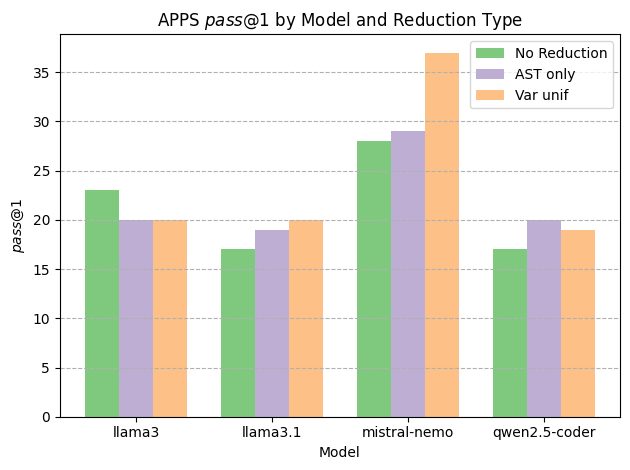

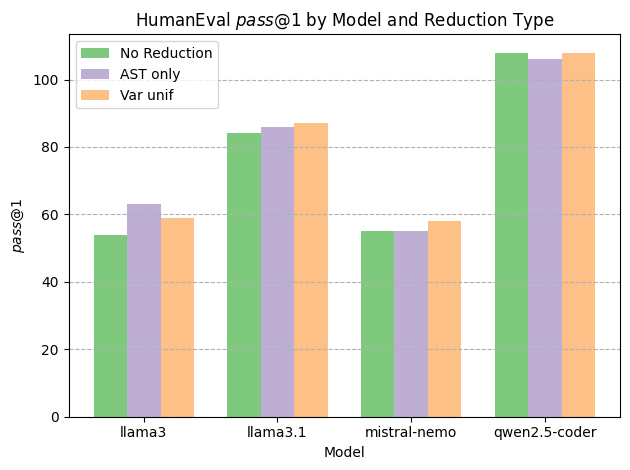

In [19]:
random.seed(42)
# reduction_mode = ["no_reduction", "ast-only", "var-unif"]
for bm in benchmarks:
    data = [[], [], []]
    for model in models:
        augmented, _ = vote("augmented", bm, model + "_augmented")
        ast_only, _ = vote("ast_only", bm, model)
        var_unif, _ = vote("var_unif", bm, model)
        data[0].append(augmented.count(True))
        data[1].append(ast_only.count(True))
        data[2].append(var_unif.count(True))

    # print(data)
    load_and_visualize(bm, models, data)
    # break
